# Problem statement
Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.
Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.


## loading the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samrat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [5]:
df_true=pd.read_csv("True.csv")

In [6]:
df_fake=pd.read_csv("Fake.csv")

In [7]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
df_true['label']="True"

In [13]:
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [14]:
df_fake['label']="Fake"

In [18]:
f=[df_true,df_fake]
df = pd.concat(f)


In [19]:
df.sample(10)

,title,text,subject,date,label
7618,"In rare move, China criticizes Trump plan to e...",BEIJING (Reuters) - China on Tuesday rejected ...,politicsNews,"November 1, 2016",True
35,"Sitting GOP Senator Has Had ENOUGH, Donates T...",Arizona Republican Senator Jeff Flake has neve...,News,"December 5, 2017",Fake
9242,California poised to shut out Republicans from...,"SACRAMENTO, Calif. (Reuters) - California vote...",politicsNews,"June 7, 2016",True
10120,THIS IS THE ALT-LEFT the Fake News Media Refus...,The media is trying their best to control what...,politics,"Aug 18, 2017",Fake
1790,Democrats Just CRUSHED A Bunch Of Republicans...,"The Democratic wave has commenced.In 2010, Rep...",News,"April 14, 2017",Fake
13466,WOW! PASTOR MARK BURNS Delivers Three Great Wo...,Pastor Mark Burns is such a fantastic speaker!...,politics,"Jul 21, 2016",Fake
20460,LOL! HYPOCRITE HILLARY Gives Speech On Evils O...,Fat ass fraud in a pants suit When Hillary Cli...,left-news,"Jun 7, 2016",Fake
16909,Senate Asks For Defense Secretary’s E-mails Af...,There must be something in the water in Washin...,Government News,"Dec 17, 2015",Fake
3412,Pantsuit Nation Just Made It EASY To Push For...,While a lot of the nation seems to not give a ...,News,"December 14, 2016",Fake
13095,Iraq accused of violating due process for Isla...,BAGHDAD (Reuters) - Iraqi federal and Kurdish ...,worldnews,"December 5, 2017",True


In [ ]:
corpus=[]
#array to store the data after the process of stemming and removal of unnecessary words

In [20]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

there are no null values in the dataset

## Label encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
df['label']=le.fit_transform(df['label'])

In [24]:
df.sample(2)

,title,text,subject,date,label
5282,WATCH: Father Of Purple Heart-Winning Muslim ...,"Khizr Khan, the father of a slain purple-heart...",News,"July 28, 2016",0
18008,Nigerian VP Osinbajo says running for presiden...,LONDON (Reuters) - Nigeria s Vice President Ye...,worldnews,"October 9, 2017",1


In [25]:
## Get the Independent Features
x=df.drop('label',axis=1)

In [26]:
## Get the Dependent features
y=df['label']

In [27]:
df.shape

(44898, 5)

dataset contains 44898 rows or data

In [28]:
messages=df.copy()

In [29]:
messages.reset_index(inplace=True)

In [30]:

messages['title'][6]

'Trump says Russia probe will be fair, but timeline unclear: NYT'

## Data preprocessing

In [31]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [32]:
corpus[10000]

'arizona man challeng primari result alleg misconduct'

### Applying lemmatization

In [35]:
from nltk.stem import WordNetLemmatizer

In [36]:
lemma=WordNetLemmatizer()

In [37]:
corpus_lemma=[]
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemma.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_lemma.append(review)

In [38]:
corpus_lemma[10000]

'arizona man challenge primary result alleging misconduct'

## Applying count vectorizer

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
x = cv.fit_transform(corpus_lemma).toarray()

In [69]:
x.shape

(44898, 5000)

In [70]:
y=messages['label']

## Train, test and split

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [72]:
cv.get_feature_names()[:20]

['abadi',
 'abandon',
 'abbas',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolute',
 'absolutely',
 'abuse',
 'academic',
 'accept',
 'accepts',
 'access',
 'accident',
 'accidentally',
 'accord']

In [73]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [74]:
import matplotlib.pyplot as plt

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB Algorithm

In [75]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.931
Confusion matrix, without normalization


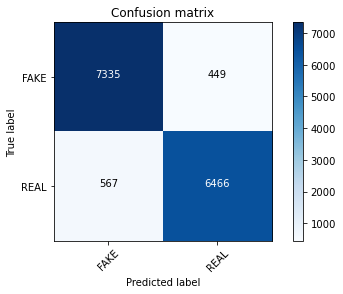

In [76]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [77]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9314301140581764

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
score=cross_val_score(classifier,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.89777283 0.88919822 0.88886414 0.94687604 0.91758548]
0.9080593421274237
0.02203403569601997


## Passive Aggressive Classifier Algorithm

In [54]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.929
Confusion matrix, without normalization


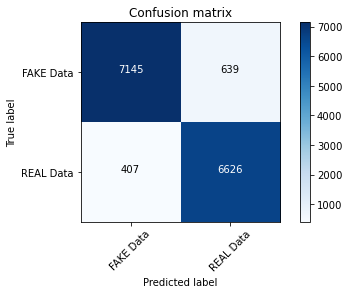

In [55]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [56]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9310926638320848

In [60]:
score=cross_val_score(linear_clf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.87305122 0.87628062 0.90556793 0.94008241 0.89286112]
0.8975686624395305
0.02428107768671803


we will move ahead with the Multinomial NB classifier since it has a better cross validation score

## Hyperparameter tuning of Mumtinomial NB classifier

In [61]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.9303502733346831
Alpha: 0.1, Score : 0.9310926638320848
Alpha: 0.2, Score : 0.9312951339677398
Alpha: 0.30000000000000004, Score : 0.9311601538773031
Alpha: 0.4, Score : 0.9312276439225214
Alpha: 0.5, Score : 0.9313626240129581
Alpha: 0.6000000000000001, Score : 0.9313626240129581
Alpha: 0.7000000000000001, Score : 0.9312951339677398
Alpha: 0.8, Score : 0.9308227036512114
Alpha: 0.9, Score : 0.9307552136059931


In [64]:
classifier=MultinomialNB(alpha=0.5)

## saving the model

In [67]:
import pickle
filename="Fake_news.pkl"
pickle.dump(classifier,open(filename,'wb'))